Bigrams and Trigrams

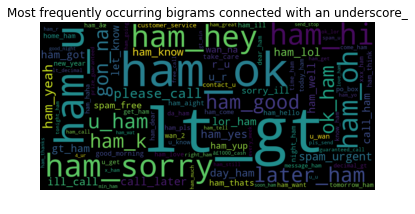


Word cloud with least frequently occurring bigrams (connected with an underscore _).


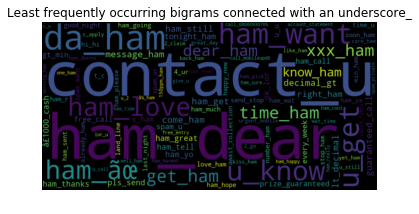

In [3]:
import nltk
from nltk.corpus import stopwords
 
from wordcloud import WordCloud
import matplotlib.pyplot as plt
 
import re
 
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder
 
from operator import itemgetter
 
WNL = nltk.WordNetLemmatizer()
 
# -----
 
def prepareStopWords():
 
    stopwordsList = []
 
    # Load default stop words and add a few more specific to my text.
    stopwordsList = stopwords.words('english')
    stopwordsList.append('dont')
    stopwordsList.append('didnt')
    stopwordsList.append('doesnt')
    stopwordsList.append('cant')
    stopwordsList.append('couldnt')
    stopwordsList.append('couldve')
    stopwordsList.append('im')
    stopwordsList.append('ive')
    stopwordsList.append('isnt')
    stopwordsList.append('theres')
    stopwordsList.append('wasnt')
    stopwordsList.append('wouldnt')
    stopwordsList.append('a')
    stopwordsList.append('also')
 
    return stopwordsList
 
# -----
 
# Open the file and read lines
# NOTE: You need to give finder.score_ngrams a sizable corpus to work with.
 
input_file = 'spam.csv'
FILEHEADER = 0
 
with open(input_file, 'r') as f:
    if FILEHEADER:
        next(f)
    rawText = f.read()
 
# Lowercase and tokenize
rawText = rawText.lower()
 
# Remove single quote early since it causes problems with the tokenizer.
# wasn't turns into 2 entries; was, n't.
rawText = rawText.replace("'", "")
 
tokens = nltk.word_tokenize(rawText)
text = nltk.Text(tokens)
 
# Load default stop words and add a few more.
stopWords = prepareStopWords()
 
# Remove extra chars and remove stop words.
text_content = [''.join(re.split("[ .,;:!?‘’``''@#$%^_&*()<>{}~\n\t\\\-]", word)) for word in text]
text_content = [word for word in text_content if word not in stopWords]
 
# After the punctuation above is removed it still leaves empty entries in the list.
# Remove any entries where the len is zero.
text_content = [s for s in text_content if len(s) != 0]
 
# Best to get the lemmas of each word to reduce the number of similar words
# on the word cloud. The default lemmatize method is noun, but this could be
# expanded.
# ex: The lemma of 'characters' is 'character'.
text_content = [WNL.lemmatize(t) for t in text_content]
 
# setup and score the bigrams using the raw frequency.
finder = BigramCollocationFinder.from_words(text_content)
bigram_measures = BigramAssocMeasures()
scored = finder.score_ngrams(bigram_measures.raw_freq)
 
# By default finder.score_ngrams is sorted, however don't rely on this default behavior.
# Sort highest to lowest based on the score.
scoredList = sorted(scored, key=itemgetter(1), reverse=True)
 
# word_dict is the dictionary we'll use for the word cloud.
# Load dictionary with the FOR loop below.
# The dictionary will look like this with the bigram and the score from above.
# word_dict = {'bigram A': 0.000697411,
#             'bigram B': 0.000524882}
 
word_dict = {}
 
listLen = len(scoredList)
 
# Get the bigram and make a contiguous string for the dictionary key. 
# Set the key to the scored value. 
for i in range(listLen):
    word_dict['_'.join(scoredList[i][0])] = scoredList[i][1]
 
 
# -----
 
# Set word cloud params and instantiate the word cloud.
# The height and width only affect the output image file.
WC_height = 500
WC_width = 1000
WC_max_words = 100
 
wordCloud = WordCloud(max_words=WC_max_words, height=WC_height, width=WC_width)
 
wordCloud.generate_from_frequencies(word_dict)
 
plt.title('Most frequently occurring bigrams connected with an underscore_')
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")
plt.show()
 
wordCloud.to_file("WordCloud_Bigrams_frequent_words.png")
 
# The following is in case you want to use PowerBI instead of the Python word cloud
with open('spams.csv', 'w') as f:
    [f.write('{0},{1}\n'.format(key, value)) for key, value in word_dict.items()]
f.close()
 
 
# -----
 
# Rather than show the most frequently occurring words, show the least frequent
# and maybe more important, salient words.
 
print("\nWord cloud with least frequently occurring bigrams (connected with an underscore _).")
 
# On large data sets (>100 for example) there can be a large number of words that occur once.
# Depending on the max words specified in the word cloud, you can get 30 words of various
# sizes but they only occur once.
 
# Sort the list to put the least common terms at the front/top.
# Infrequent start at the scoredList[0]. The MOST frequent word appears in
# the last position at scoredList[len(scored)-1]
 
# Sort lowest to highest based on the score.
scoredList = sorted(scored, key=itemgetter(1))
 
scoredListLen = len(scoredList)-1
 
# There is no need to stuff the dictinary with more words than will be
# rendered by the word cloud. A counter below will ensure the dictionary
# doesn't exceed the prior max words configured in the word cloud above.
maxLenCnt = 0
 
# Below MIN SCORE is the minimum score from score_ngrams(bigram_measures.raw_freq)
# that a N-gram need to achieve to be included in the word cloud. This is based
# solely on looking at N-gram score and manual configuration.
MINSCORE = 0.000265
 
# Index for the scored list
indx = 0
 
# Find the starting point in the SORTED list where the score of a term
# is greater than MIN SCORE defined above.
while (indx < scoredListLen) and (scoredList[indx][1] < MINSCORE):
    indx += 1
    #print("Indx: ", indx)
    #print(scoredList[indx])
 
# dictionary to hold the scored list with the chosen scores.
word_dict2 = {}
 
# Create the dictionary with the bigrams using the starting point found above.
while (indx < scoredListLen) and (maxLenCnt < WC_max_words):
    word_dict2['_'.join(scoredList[indx][0])] = scoredList[indx][1]
    indx +=  1
    maxLenCnt += 1
 
# Ensure the dictionary isn't empty before creating word cloud.
if len(word_dict2) > 0:
    wordCloud.generate_from_frequencies(word_dict2)
    plt.title('Least frequently occurring bigrams connected with an underscore_')
    plt.imshow(wordCloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    wordCloud.to_file("WordCloud_Bigrams_Infrequent_words.png")
else:
    print("\nThere were no words to display in the word cloud.")
 


In [2]:
from nltk import everygrams
import pandas as pd

mails = pd.read_csv('spam.csv')
for i in mails.Message:
    print('Bigrams:')
    print(list(everygrams(i.split(), 2,2)))
    print('Trigrams:')
    print(list(everygrams(i.split(), 3,3)))

Bigrams:
[('Go', 'until'), ('until', 'jurong'), ('jurong', 'point,'), ('point,', 'crazy..'), ('crazy..', 'Available'), ('Available', 'only'), ('only', 'in'), ('in', 'bugis'), ('bugis', 'n'), ('n', 'great'), ('great', 'world'), ('world', 'la'), ('la', 'e'), ('e', 'buffet...'), ('buffet...', 'Cine'), ('Cine', 'there'), ('there', 'got'), ('got', 'amore'), ('amore', 'wat...')]
Trigrams:
[('Go', 'until', 'jurong'), ('until', 'jurong', 'point,'), ('jurong', 'point,', 'crazy..'), ('point,', 'crazy..', 'Available'), ('crazy..', 'Available', 'only'), ('Available', 'only', 'in'), ('only', 'in', 'bugis'), ('in', 'bugis', 'n'), ('bugis', 'n', 'great'), ('n', 'great', 'world'), ('great', 'world', 'la'), ('world', 'la', 'e'), ('la', 'e', 'buffet...'), ('e', 'buffet...', 'Cine'), ('buffet...', 'Cine', 'there'), ('Cine', 'there', 'got'), ('there', 'got', 'amore'), ('got', 'amore', 'wat...')]
Bigrams:
[('Ok', 'lar...'), ('lar...', 'Joking'), ('Joking', 'wif'), ('wif', 'u'), ('u', 'oni...')]
Trigrams:
[

[('Although', 'i', 'told'), ('i', 'told', 'u'), ('told', 'u', 'dat'), ('u', 'dat', "i'm"), ('dat', "i'm", 'into'), ("i'm", 'into', 'baig'), ('into', 'baig', 'face'), ('baig', 'face', 'watches'), ('face', 'watches', 'now'), ('watches', 'now', 'but'), ('now', 'but', 'i'), ('but', 'i', 'really'), ('i', 'really', 'like'), ('really', 'like', 'e'), ('like', 'e', 'watch'), ('e', 'watch', 'u'), ('watch', 'u', 'gave'), ('u', 'gave', 'cos'), ('gave', 'cos', "it's"), ('cos', "it's", 'fr'), ("it's", 'fr', 'u.'), ('fr', 'u.', 'Thanx'), ('u.', 'Thanx', '4'), ('Thanx', '4', 'everything'), ('4', 'everything', 'dat'), ('everything', 'dat', "u've"), ('dat', "u've", 'done'), ("u've", 'done', 'today,'), ('done', 'today,', "i'm"), ('today,', "i'm", 'touched...')]
Bigrams:
[('U', "don't"), ("don't", 'remember'), ('remember', 'that'), ('that', 'old'), ('old', 'commercial?')]
Trigrams:
[('U', "don't", 'remember'), ("don't", 'remember', 'that'), ('remember', 'that', 'old'), ('that', 'old', 'commercial?')]
Bigr

[('Wat', 'uniform?', 'In'), ('uniform?', 'In', 'where'), ('In', 'where', 'get?')]
Bigrams:
[('Cool,', 'text'), ('text', 'me'), ('me', 'when'), ('when', "you're"), ("you're", 'ready')]
Trigrams:
[('Cool,', 'text', 'me'), ('text', 'me', 'when'), ('me', 'when', "you're"), ('when', "you're", 'ready')]
Bigrams:
[('Hello', 'my'), ('my', 'boytoy'), ('boytoy', '...'), ('...', 'Geeee'), ('Geeee', 'I'), ('I', 'miss'), ('miss', 'you'), ('you', 'already'), ('already', 'and'), ('and', 'I'), ('I', 'just'), ('just', 'woke'), ('woke', 'up.'), ('up.', 'I'), ('I', 'wish'), ('wish', 'you'), ('you', 'were'), ('were', 'here'), ('here', 'in'), ('in', 'bed'), ('bed', 'with'), ('with', 'me,'), ('me,', 'cuddling'), ('cuddling', 'me.'), ('me.', 'I'), ('I', 'love'), ('love', 'you'), ('you', '...')]
Trigrams:
[('Hello', 'my', 'boytoy'), ('my', 'boytoy', '...'), ('boytoy', '...', 'Geeee'), ('...', 'Geeee', 'I'), ('Geeee', 'I', 'miss'), ('I', 'miss', 'you'), ('miss', 'you', 'already'), ('you', 'already', 'and'), ('

Trigrams:
[('What', 'class', 'of'), ('class', 'of', '&lt;#&gt;'), ('of', '&lt;#&gt;', 'reunion?')]
Bigrams:
[('Are', 'you'), ('you', 'free'), ('free', 'now?can'), ('now?can', 'i'), ('i', 'call'), ('call', 'now?')]
Trigrams:
[('Are', 'you', 'free'), ('you', 'free', 'now?can'), ('free', 'now?can', 'i'), ('now?can', 'i', 'call'), ('i', 'call', 'now?')]
Bigrams:
[('Got', 'meh...'), ('meh...', 'When?')]
Trigrams:
[('Got', 'meh...', 'When?')]
Bigrams:
[('Nope...', 'Think'), ('Think', 'i'), ('i', 'will'), ('will', 'go'), ('go', 'for'), ('for', 'it'), ('it', 'on'), ('on', 'monday...'), ('monday...', 'Sorry'), ('Sorry', 'i'), ('i', 'replied'), ('replied', 'so'), ('so', 'late')]
Trigrams:
[('Nope...', 'Think', 'i'), ('Think', 'i', 'will'), ('i', 'will', 'go'), ('will', 'go', 'for'), ('go', 'for', 'it'), ('for', 'it', 'on'), ('it', 'on', 'monday...'), ('on', 'monday...', 'Sorry'), ('monday...', 'Sorry', 'i'), ('Sorry', 'i', 'replied'), ('i', 'replied', 'so'), ('replied', 'so', 'late')]
Bigrams:
[

Trigrams:
[('I', 'come', 'n'), ('come', 'n', 'pick'), ('n', 'pick', 'ü'), ('pick', 'ü', 'up...'), ('ü', 'up...', 'Come'), ('up...', 'Come', 'out'), ('Come', 'out', 'immediately'), ('out', 'immediately', 'aft'), ('immediately', 'aft', 'ur'), ('aft', 'ur', 'lesson...')]
Bigrams:
[('Let', 'there'), ('there', 'be'), ('be', 'snow.'), ('snow.', 'Let'), ('Let', 'there'), ('there', 'be'), ('be', 'snow.'), ('snow.', 'This'), ('This', 'kind'), ('kind', 'of'), ('of', 'weather'), ('weather', 'brings'), ('brings', 'ppl'), ('ppl', 'together'), ('together', 'so'), ('so', 'friendships'), ('friendships', 'can'), ('can', 'grow.')]
Trigrams:
[('Let', 'there', 'be'), ('there', 'be', 'snow.'), ('be', 'snow.', 'Let'), ('snow.', 'Let', 'there'), ('Let', 'there', 'be'), ('there', 'be', 'snow.'), ('be', 'snow.', 'This'), ('snow.', 'This', 'kind'), ('This', 'kind', 'of'), ('kind', 'of', 'weather'), ('of', 'weather', 'brings'), ('weather', 'brings', 'ppl'), ('brings', 'ppl', 'together'), ('ppl', 'together', 'so'

[('Ok.', 'There'), ('There', 'may'), ('may', 'be'), ('be', 'a'), ('a', 'free'), ('free', 'gym'), ('gym', 'about.')]
Trigrams:
[('Ok.', 'There', 'may'), ('There', 'may', 'be'), ('may', 'be', 'a'), ('be', 'a', 'free'), ('a', 'free', 'gym'), ('free', 'gym', 'about.')]
Bigrams:
[('Men', 'like'), ('like', 'shorter'), ('shorter', 'ladies.'), ('ladies.', 'Gaze'), ('Gaze', 'up'), ('up', 'into'), ('into', 'his'), ('his', 'eyes.')]
Trigrams:
[('Men', 'like', 'shorter'), ('like', 'shorter', 'ladies.'), ('shorter', 'ladies.', 'Gaze'), ('ladies.', 'Gaze', 'up'), ('Gaze', 'up', 'into'), ('up', 'into', 'his'), ('into', 'his', 'eyes.')]
Bigrams:
[('Dunno', 'he'), ('he', 'jus'), ('jus', 'say'), ('say', 'go'), ('go', 'lido.'), ('lido.', 'Same'), ('Same', 'time'), ('time', '930.')]
Trigrams:
[('Dunno', 'he', 'jus'), ('he', 'jus', 'say'), ('jus', 'say', 'go'), ('say', 'go', 'lido.'), ('go', 'lido.', 'Same'), ('lido.', 'Same', 'time'), ('Same', 'time', '930.')]
Bigrams:
[('I', 'promise'), ('promise', 'to')

[('Hello.', 'We'), ('We', 'need'), ('need', 'some'), ('some', 'posh'), ('posh', 'birds'), ('birds', 'and'), ('and', 'chaps'), ('chaps', 'to'), ('to', 'user'), ('user', 'trial'), ('trial', 'prods'), ('prods', 'for'), ('for', 'champneys.'), ('champneys.', 'Can'), ('Can', 'i'), ('i', 'put'), ('put', 'you'), ('you', 'down?'), ('down?', 'I'), ('I', 'need'), ('need', 'your'), ('your', 'address'), ('address', 'and'), ('and', 'dob'), ('dob', 'asap.'), ('asap.', 'Ta'), ('Ta', 'r')]
Trigrams:
[('Hello.', 'We', 'need'), ('We', 'need', 'some'), ('need', 'some', 'posh'), ('some', 'posh', 'birds'), ('posh', 'birds', 'and'), ('birds', 'and', 'chaps'), ('and', 'chaps', 'to'), ('chaps', 'to', 'user'), ('to', 'user', 'trial'), ('user', 'trial', 'prods'), ('trial', 'prods', 'for'), ('prods', 'for', 'champneys.'), ('for', 'champneys.', 'Can'), ('champneys.', 'Can', 'i'), ('Can', 'i', 'put'), ('i', 'put', 'you'), ('put', 'you', 'down?'), ('you', 'down?', 'I'), ('down?', 'I', 'need'), ('I', 'need', 'your'),

Bigrams:
[('The', 'Xmas'), ('Xmas', 'story'), ('story', 'is'), ('is', 'peace..'), ('peace..', 'The'), ('The', 'Xmas'), ('Xmas', 'msg'), ('msg', 'is'), ('is', 'love..'), ('love..', 'The'), ('The', 'Xmas'), ('Xmas', 'miracle'), ('miracle', 'is'), ('is', 'jesus..'), ('jesus..', 'Hav'), ('Hav', 'a'), ('a', 'blessed'), ('blessed', 'month'), ('month', 'ahead'), ('ahead', '&amp;'), ('&amp;', 'wish'), ('wish', 'U'), ('U', 'Merry'), ('Merry', 'Xmas...')]
Trigrams:
[('The', 'Xmas', 'story'), ('Xmas', 'story', 'is'), ('story', 'is', 'peace..'), ('is', 'peace..', 'The'), ('peace..', 'The', 'Xmas'), ('The', 'Xmas', 'msg'), ('Xmas', 'msg', 'is'), ('msg', 'is', 'love..'), ('is', 'love..', 'The'), ('love..', 'The', 'Xmas'), ('The', 'Xmas', 'miracle'), ('Xmas', 'miracle', 'is'), ('miracle', 'is', 'jesus..'), ('is', 'jesus..', 'Hav'), ('jesus..', 'Hav', 'a'), ('Hav', 'a', 'blessed'), ('a', 'blessed', 'month'), ('blessed', 'month', 'ahead'), ('month', 'ahead', '&amp;'), ('ahead', '&amp;', 'wish'), ('&amp

[('To', 'day', 'class'), ('day', 'class', 'is'), ('class', 'is', 'there'), ('is', 'there', 'are'), ('there', 'are', 'no'), ('are', 'no', 'class.')]
Bigrams:
[("I'm", 'in'), ('in', 'chennai'), ('chennai', 'velachery:)')]
Trigrams:
[("I'm", 'in', 'chennai'), ('in', 'chennai', 'velachery:)')]
Bigrams:
[('You', 'flippin'), ('flippin', 'your'), ('your', 'shit'), ('shit', 'yet?')]
Trigrams:
[('You', 'flippin', 'your'), ('flippin', 'your', 'shit'), ('your', 'shit', 'yet?')]
Bigrams:
[('K', 'give'), ('give', 'me'), ('me', 'a'), ('a', 'sec,'), ('sec,', 'breaking'), ('breaking', 'a'), ('a', '&lt;#&gt;'), ('&lt;#&gt;', 'at'), ('at', 'cstore')]
Trigrams:
[('K', 'give', 'me'), ('give', 'me', 'a'), ('me', 'a', 'sec,'), ('a', 'sec,', 'breaking'), ('sec,', 'breaking', 'a'), ('breaking', 'a', '&lt;#&gt;'), ('a', '&lt;#&gt;', 'at'), ('&lt;#&gt;', 'at', 'cstore')]
Bigrams:
[('Am', 'i'), ('i', 'that'), ('that', 'much'), ('much', 'bad'), ('bad', 'to'), ('to', 'avoid'), ('avoid', 'like'), ('like', 'this?')]

[('Nobody', 'can', 'decide'), ('can', 'decide', 'where'), ('decide', 'where', 'to'), ('where', 'to', 'eat'), ('to', 'eat', 'and'), ('eat', 'and', 'dad'), ('and', 'dad', 'wants'), ('dad', 'wants', 'Chinese')]
Bigrams:
[('No', 'shoot'), ('shoot', 'me.'), ('me.', "I'm"), ("I'm", 'in'), ('in', 'the'), ('the', 'docs'), ('docs', 'waiting'), ('waiting', 'room.'), ('room.', ':/')]
Trigrams:
[('No', 'shoot', 'me.'), ('shoot', 'me.', "I'm"), ('me.', "I'm", 'in'), ("I'm", 'in', 'the'), ('in', 'the', 'docs'), ('the', 'docs', 'waiting'), ('docs', 'waiting', 'room.'), ('waiting', 'room.', ':/')]
Bigrams:
[('Now?', "I'm"), ("I'm", 'going'), ('going', 'out'), ('out', '4'), ('4', 'dinner'), ('dinner', 'soon..')]
Trigrams:
[('Now?', "I'm", 'going'), ("I'm", 'going', 'out'), ('going', 'out', '4'), ('out', '4', 'dinner'), ('4', 'dinner', 'soon..')]
Bigrams:
[('Hello', 'which'), ('which', 'the'), ('the', 'site'), ('site', 'to'), ('to', 'download'), ('download', 'songs'), ('songs', 'its'), ('its', 'urgent')

[('In', 'the', 'end'), ('the', 'end', 'she'), ('end', 'she', 'might'), ('she', 'might', 'still'), ('might', 'still', 'vomit'), ('still', 'vomit', 'but'), ('vomit', 'but', 'its'), ('but', 'its', 'okay.'), ('its', 'okay.', 'Not'), ('okay.', 'Not', 'everything'), ('Not', 'everything', 'will'), ('everything', 'will', 'come'), ('will', 'come', 'out.')]
Bigrams:
[('How', 'are'), ('are', 'you'), ('you', 'with'), ('with', 'moneY...as'), ('moneY...as', 'in'), ('in', 'to'), ('to', 'you...money'), ('you...money', 'aint'), ('aint', 'a'), ('a', 'thing....how'), ('thing....how', 'are'), ('are', 'you'), ('you', 'sha!')]
Trigrams:
[('How', 'are', 'you'), ('are', 'you', 'with'), ('you', 'with', 'moneY...as'), ('with', 'moneY...as', 'in'), ('moneY...as', 'in', 'to'), ('in', 'to', 'you...money'), ('to', 'you...money', 'aint'), ('you...money', 'aint', 'a'), ('aint', 'a', 'thing....how'), ('a', 'thing....how', 'are'), ('thing....how', 'are', 'you'), ('are', 'you', 'sha!')]
Bigrams:
[('It', 'has'), ('has', 

Trigrams:
[('Did', 'u', 'download'), ('u', 'download', 'the'), ('download', 'the', 'fring'), ('the', 'fring', 'app?')]
Bigrams:
[('The', '2'), ('2', 'oz'), ('oz', 'guy'), ('guy', 'is'), ('is', 'being'), ('being', 'kinda'), ('kinda', 'flaky'), ('flaky', 'but'), ('but', 'one'), ('one', 'friend'), ('friend', 'is'), ('is', 'interested'), ('interested', 'in'), ('in', 'picking'), ('picking', 'up'), ('up', '$'), ('$', '&lt;#&gt;'), ('&lt;#&gt;', 'worth'), ('worth', 'tonight'), ('tonight', 'if'), ('if', 'possible')]
Trigrams:
[('The', '2', 'oz'), ('2', 'oz', 'guy'), ('oz', 'guy', 'is'), ('guy', 'is', 'being'), ('is', 'being', 'kinda'), ('being', 'kinda', 'flaky'), ('kinda', 'flaky', 'but'), ('flaky', 'but', 'one'), ('but', 'one', 'friend'), ('one', 'friend', 'is'), ('friend', 'is', 'interested'), ('is', 'interested', 'in'), ('interested', 'in', 'picking'), ('in', 'picking', 'up'), ('picking', 'up', '$'), ('up', '$', '&lt;#&gt;'), ('$', '&lt;#&gt;', 'worth'), ('&lt;#&gt;', 'worth', 'tonight'), 

Trigrams:
[('EY!', 'CALM', 'DOWNON'), ('CALM', 'DOWNON', 'THEACUSATIONS..'), ('DOWNON', 'THEACUSATIONS..', 'ITXT'), ('THEACUSATIONS..', 'ITXT', 'U'), ('ITXT', 'U', 'COS'), ('U', 'COS', 'IWANA'), ('COS', 'IWANA', 'KNOW'), ('IWANA', 'KNOW', 'WOTU'), ('KNOW', 'WOTU', 'R'), ('WOTU', 'R', 'DOIN'), ('R', 'DOIN', 'AT'), ('DOIN', 'AT', 'THEW/END...'), ('AT', 'THEW/END...', 'HAVENTCN'), ('THEW/END...', 'HAVENTCN', 'U'), ('HAVENTCN', 'U', 'IN'), ('U', 'IN', 'AGES..RING'), ('IN', 'AGES..RING', 'ME'), ('AGES..RING', 'ME', 'IF'), ('ME', 'IF', 'UR'), ('IF', 'UR', 'UP4'), ('UR', 'UP4', 'NETHING'), ('UP4', 'NETHING', 'SAT.LOVE'), ('NETHING', 'SAT.LOVE', 'J'), ('SAT.LOVE', 'J', 'XXX.')]
Bigrams:
[('I', 'love'), ('love', 'to'), ('to', 'wine'), ('wine', 'and'), ('and', 'dine'), ('dine', 'my'), ('my', 'lady!')]
Trigrams:
[('I', 'love', 'to'), ('love', 'to', 'wine'), ('to', 'wine', 'and'), ('wine', 'and', 'dine'), ('and', 'dine', 'my'), ('dine', 'my', 'lady!')]
Bigrams:
[('Someone', 'has'), ('has', 'conact

[('Mmmm', '...'), ('...', 'Fuck'), ('Fuck', '...'), ('...', 'Not'), ('Not', 'fair'), ('fair', '!'), ('!', 'You'), ('You', 'know'), ('know', 'my'), ('my', 'weaknesses'), ('weaknesses', '!'), ('!', '*grins*'), ('*grins*', '*pushes'), ('*pushes', 'you'), ('you', 'to'), ('to', 'your'), ('your', "knee's*"), ("knee's*", '*exposes'), ('*exposes', 'my'), ('my', 'belly'), ('belly', 'and'), ('and', 'pulls'), ('pulls', 'your'), ('your', 'head'), ('head', 'to'), ('to', 'it*'), ('it*', "Don't"), ("Don't", 'forget'), ('forget', '...'), ('...', 'I'), ('I', 'know'), ('know', 'yours'), ('yours', 'too'), ('too', '*wicked'), ('*wicked', 'smile*')]
Trigrams:
[('Mmmm', '...', 'Fuck'), ('...', 'Fuck', '...'), ('Fuck', '...', 'Not'), ('...', 'Not', 'fair'), ('Not', 'fair', '!'), ('fair', '!', 'You'), ('!', 'You', 'know'), ('You', 'know', 'my'), ('know', 'my', 'weaknesses'), ('my', 'weaknesses', '!'), ('weaknesses', '!', '*grins*'), ('!', '*grins*', '*pushes'), ('*grins*', '*pushes', 'you'), ('*pushes', 'you'

[('Free', 'tones'), ('tones', 'Hope'), ('Hope', 'you'), ('you', 'enjoyed'), ('enjoyed', 'your'), ('your', 'new'), ('new', 'content.'), ('content.', 'text'), ('text', 'stop'), ('stop', 'to'), ('to', '61610'), ('61610', 'to'), ('to', 'unsubscribe.'), ('unsubscribe.', 'help:08712400602450p'), ('help:08712400602450p', 'Provided'), ('Provided', 'by'), ('by', 'tones2you.co.uk')]
Trigrams:
[('Free', 'tones', 'Hope'), ('tones', 'Hope', 'you'), ('Hope', 'you', 'enjoyed'), ('you', 'enjoyed', 'your'), ('enjoyed', 'your', 'new'), ('your', 'new', 'content.'), ('new', 'content.', 'text'), ('content.', 'text', 'stop'), ('text', 'stop', 'to'), ('stop', 'to', '61610'), ('to', '61610', 'to'), ('61610', 'to', 'unsubscribe.'), ('to', 'unsubscribe.', 'help:08712400602450p'), ('unsubscribe.', 'help:08712400602450p', 'Provided'), ('help:08712400602450p', 'Provided', 'by'), ('Provided', 'by', 'tones2you.co.uk')]
Bigrams:
[('Eh', 'den'), ('den', 'sat'), ('sat', 'u'), ('u', 'book'), ('book', 'e'), ('e', 'kb'), 

Bigrams:
[('Wish', 'u'), ('u', 'many'), ('many', 'many'), ('many', 'returns'), ('returns', 'of'), ('of', 'the'), ('the', 'day..'), ('day..', 'Happy'), ('Happy', 'birthday'), ('birthday', 'vikky..')]
Trigrams:
[('Wish', 'u', 'many'), ('u', 'many', 'many'), ('many', 'many', 'returns'), ('many', 'returns', 'of'), ('returns', 'of', 'the'), ('of', 'the', 'day..'), ('the', 'day..', 'Happy'), ('day..', 'Happy', 'birthday'), ('Happy', 'birthday', 'vikky..')]
Bigrams:
[('U', 'can'), ('can', 'WIN'), ('WIN', '£100'), ('£100', 'of'), ('of', 'Music'), ('Music', 'Gift'), ('Gift', 'Vouchers'), ('Vouchers', 'every'), ('every', 'week'), ('week', 'starting'), ('starting', 'NOW'), ('NOW', 'Txt'), ('Txt', 'the'), ('the', 'word'), ('word', 'DRAW'), ('DRAW', 'to'), ('to', '87066'), ('87066', 'TsCs'), ('TsCs', 'www.Idew.com'), ('www.Idew.com', 'SkillGame,'), ('SkillGame,', '1Winaweek,'), ('1Winaweek,', 'age16.'), ('age16.', '150ppermessSubscription')]
Trigrams:
[('U', 'can', 'WIN'), ('can', 'WIN', '£100'), (

Bigrams:
[('Nope', 'wif'), ('wif', 'my'), ('my', 'sis'), ('sis', 'lor...'), ('lor...', 'Aft'), ('Aft', 'bathing'), ('bathing', 'my'), ('my', 'dog'), ('dog', 'then'), ('then', 'i'), ('i', 'can'), ('can', 'bathe...'), ('bathe...', 'Looks'), ('Looks', 'like'), ('like', "it's"), ("it's", 'going'), ('going', '2'), ('2', 'rain'), ('rain', 'soon.')]
Trigrams:
[('Nope', 'wif', 'my'), ('wif', 'my', 'sis'), ('my', 'sis', 'lor...'), ('sis', 'lor...', 'Aft'), ('lor...', 'Aft', 'bathing'), ('Aft', 'bathing', 'my'), ('bathing', 'my', 'dog'), ('my', 'dog', 'then'), ('dog', 'then', 'i'), ('then', 'i', 'can'), ('i', 'can', 'bathe...'), ('can', 'bathe...', 'Looks'), ('bathe...', 'Looks', 'like'), ('Looks', 'like', "it's"), ('like', "it's", 'going'), ("it's", 'going', '2'), ('going', '2', 'rain'), ('2', 'rain', 'soon.')]
Bigrams:
[('Boo', "I'm"), ("I'm", 'on'), ('on', 'my'), ('my', 'way'), ('way', 'to'), ('to', 'my'), ('my', 'moms.'), ('moms.', "She's"), ("She's", 'making'), ('making', 'tortilla'), ('tor

[('Greetings', 'me,', '!'), ('me,', '!', 'Consider'), ('!', 'Consider', 'yourself'), ('Consider', 'yourself', 'excused.')]
Bigrams:
[('No', 'drama'), ('drama', 'Pls.i'), ('Pls.i', 'have'), ('have', 'had'), ('had', 'enough'), ('enough', 'from'), ('from', 'you'), ('you', 'and'), ('and', 'family'), ('family', 'while'), ('while', 'i'), ('i', 'am'), ('am', 'struggling'), ('struggling', 'in'), ('in', 'the'), ('the', 'hot'), ('hot', 'sun'), ('sun', 'in'), ('in', 'a'), ('a', 'strange'), ('strange', 'place.No'), ('place.No', 'reason'), ('reason', 'why'), ('why', 'there'), ('there', 'should'), ('should', 'be'), ('be', 'an'), ('an', 'ego'), ('ego', 'of'), ('of', 'not'), ('not', 'going'), ('going', "'IF"), ("'IF", 'NOT'), ('NOT', "INVITED'"), ("INVITED'", 'when'), ('when', 'actually'), ('actually', 'its'), ('its', 'necessity'), ('necessity', 'to'), ('to', 'go.wait'), ('go.wait', 'for'), ('for', 'very'), ('very', 'serious'), ('serious', 'reppurcussions.')]
Trigrams:
[('No', 'drama', 'Pls.i'), ('dra

[('I', "don't", 'know'), ("don't", 'know', 'u'), ('know', 'u', 'and'), ('u', 'and', 'u'), ('and', 'u', "don't"), ('u', "don't", 'know'), ("don't", 'know', 'me.'), ('know', 'me.', 'Send'), ('me.', 'Send', 'CHAT'), ('Send', 'CHAT', 'to'), ('CHAT', 'to', '86688'), ('to', '86688', 'now'), ('86688', 'now', 'and'), ('now', 'and', "let's"), ('and', "let's", 'find'), ("let's", 'find', 'each'), ('find', 'each', 'other!'), ('each', 'other!', 'Only'), ('other!', 'Only', '150p/Msg'), ('Only', '150p/Msg', 'rcvd.'), ('150p/Msg', 'rcvd.', 'HG/Suite342/2Lands/Row/W1J6HL'), ('rcvd.', 'HG/Suite342/2Lands/Row/W1J6HL', 'LDN.'), ('HG/Suite342/2Lands/Row/W1J6HL', 'LDN.', '18'), ('LDN.', '18', 'years'), ('18', 'years', 'or'), ('years', 'or', 'over.')]
Bigrams:
[('No', '*'), ('*', 'am'), ('am', 'working'), ('working', 'on'), ('on', 'the'), ('the', 'ringing'), ('ringing', 'u'), ('u', 'thing'), ('thing', 'but'), ('but', 'have'), ('have', 'whole'), ('whole', 'houseful'), ('houseful', 'of'), ('of', 'screaming'), 

Trigrams:
[('HOT', 'LIVE', 'FANTASIES'), ('LIVE', 'FANTASIES', 'call'), ('FANTASIES', 'call', 'now'), ('call', 'now', '08707509020'), ('now', '08707509020', 'Just'), ('08707509020', 'Just', '20p'), ('Just', '20p', 'per'), ('20p', 'per', 'min'), ('per', 'min', 'NTT'), ('min', 'NTT', 'Ltd,'), ('NTT', 'Ltd,', 'PO'), ('Ltd,', 'PO', 'Box'), ('PO', 'Box', '1327'), ('Box', '1327', 'Croydon'), ('1327', 'Croydon', 'CR9'), ('Croydon', 'CR9', '5WB'), ('CR9', '5WB', '0870'), ('5WB', '0870', 'is'), ('0870', 'is', 'a'), ('is', 'a', 'national'), ('a', 'national', 'rate'), ('national', 'rate', 'call')]
Bigrams:
[('K.i', "did't"), ("did't", 'see'), ('see', 'you.:)k:)where'), ('you.:)k:)where', 'are'), ('are', 'you'), ('you', 'now?')]
Trigrams:
[('K.i', "did't", 'see'), ("did't", 'see', 'you.:)k:)where'), ('see', 'you.:)k:)where', 'are'), ('you.:)k:)where', 'are', 'you'), ('are', 'you', 'now?')]
Bigrams:
[('So', "i'm"), ("i'm", 'doing'), ('doing', 'a'), ('a', 'list'), ('list', 'of'), ('of', 'buyers.')]


Trigrams:
[('Ok', "i've", 'sent'), ("i've", 'sent', 'u'), ('sent', 'u', 'da'), ('u', 'da', 'latest'), ('da', 'latest', 'version'), ('latest', 'version', 'of'), ('version', 'of', 'da'), ('of', 'da', 'project.')]
Bigrams:
[('Good', 'Morning'), ('Morning', 'my'), ('my', 'Dear...........'), ('Dear...........', 'Have'), ('Have', 'a'), ('a', 'great'), ('great', '&amp;'), ('&amp;', 'successful'), ('successful', 'day.')]
Trigrams:
[('Good', 'Morning', 'my'), ('Morning', 'my', 'Dear...........'), ('my', 'Dear...........', 'Have'), ('Dear...........', 'Have', 'a'), ('Have', 'a', 'great'), ('a', 'great', '&amp;'), ('great', '&amp;', 'successful'), ('&amp;', 'successful', 'day.')]
Bigrams:
[('Pls', 'accept'), ('accept', 'me'), ('me', 'for'), ('for', 'one'), ('one', 'day.'), ('day.', 'Or'), ('Or', 'am'), ('am', 'begging'), ('begging', 'you'), ('you', 'change'), ('change', 'the'), ('the', 'number.')]
Trigrams:
[('Pls', 'accept', 'me'), ('accept', 'me', 'for'), ('me', 'for', 'one'), ('for', 'one', 'd

[('I', 'am'), ('am', 'waiting'), ('waiting', 'for'), ('for', 'your'), ('your', 'call'), ('call', 'sir.')]
Trigrams:
[('I', 'am', 'waiting'), ('am', 'waiting', 'for'), ('waiting', 'for', 'your'), ('for', 'your', 'call'), ('your', 'call', 'sir.')]
Bigrams:
[('Hey', 'what'), ('what', 'are'), ('are', 'you'), ('you', 'doing.'), ('doing.', 'Y'), ('Y', 'no'), ('no', 'reply'), ('reply', 'pa..')]
Trigrams:
[('Hey', 'what', 'are'), ('what', 'are', 'you'), ('are', 'you', 'doing.'), ('you', 'doing.', 'Y'), ('doing.', 'Y', 'no'), ('Y', 'no', 'reply'), ('no', 'reply', 'pa..')]
Bigrams:
[('Hey', 'elaine,'), ('elaine,', 'is'), ('is', "today's"), ("today's", 'meeting'), ('meeting', 'still'), ('still', 'on?')]
Trigrams:
[('Hey', 'elaine,', 'is'), ('elaine,', 'is', "today's"), ('is', "today's", 'meeting'), ("today's", 'meeting', 'still'), ('meeting', 'still', 'on?')]
Bigrams:
[('Sorry', "i've"), ("i've", 'not'), ('not', 'gone'), ('gone', 'to'), ('to', 'that'), ('that', 'place.'), ('place.', 'I.ll'), ('I.

[('Can', 'you'), ('you', 'please'), ('please', 'ask'), ('ask', 'macho'), ('macho', 'what'), ('what', 'his'), ('his', 'price'), ('price', 'range'), ('range', 'is,'), ('is,', 'does'), ('does', 'he'), ('he', 'want'), ('want', 'something'), ('something', 'new'), ('new', 'or'), ('or', 'used'), ('used', 'plus'), ('plus', 'it'), ('it', 'he'), ('he', 'only'), ('only', 'interfued'), ('interfued', 'in'), ('in', 'the'), ('the', 'blackberry'), ('blackberry', 'bold'), ('bold', '&lt;#&gt;'), ('&lt;#&gt;', 'or'), ('or', 'any'), ('any', 'bb')]
Trigrams:
[('Can', 'you', 'please'), ('you', 'please', 'ask'), ('please', 'ask', 'macho'), ('ask', 'macho', 'what'), ('macho', 'what', 'his'), ('what', 'his', 'price'), ('his', 'price', 'range'), ('price', 'range', 'is,'), ('range', 'is,', 'does'), ('is,', 'does', 'he'), ('does', 'he', 'want'), ('he', 'want', 'something'), ('want', 'something', 'new'), ('something', 'new', 'or'), ('new', 'or', 'used'), ('or', 'used', 'plus'), ('used', 'plus', 'it'), ('plus', 'it

Bigrams:
[('2/2', '146tf150p')]
Trigrams:
[]
Bigrams:
[('Hey', "i'm"), ("i'm", 'bored...'), ('bored...', 'So'), ('So', "i'm"), ("i'm", 'thinking'), ('thinking', 'of'), ('of', 'u...'), ('u...', 'So'), ('So', 'wat'), ('wat', 'r'), ('r', 'u'), ('u', 'doing?')]
Trigrams:
[('Hey', "i'm", 'bored...'), ("i'm", 'bored...', 'So'), ('bored...', 'So', "i'm"), ('So', "i'm", 'thinking'), ("i'm", 'thinking', 'of'), ('thinking', 'of', 'u...'), ('of', 'u...', 'So'), ('u...', 'So', 'wat'), ('So', 'wat', 'r'), ('wat', 'r', 'u'), ('r', 'u', 'doing?')]
Bigrams:
[('Nah,', 'Wednesday.'), ('Wednesday.', 'When'), ('When', 'should'), ('should', 'I'), ('I', 'bring'), ('bring', 'the'), ('the', 'mini'), ('mini', 'cheetos'), ('cheetos', 'bag'), ('bag', 'over?')]
Trigrams:
[('Nah,', 'Wednesday.', 'When'), ('Wednesday.', 'When', 'should'), ('When', 'should', 'I'), ('should', 'I', 'bring'), ('I', 'bring', 'the'), ('bring', 'the', 'mini'), ('the', 'mini', 'cheetos'), ('mini', 'cheetos', 'bag'), ('cheetos', 'bag', 'ove

Bigrams:
[('Theoretically', 'yeah,'), ('yeah,', 'he'), ('he', 'could'), ('could', 'be'), ('be', 'able'), ('able', 'to'), ('to', 'come')]
Trigrams:
[('Theoretically', 'yeah,', 'he'), ('yeah,', 'he', 'could'), ('he', 'could', 'be'), ('could', 'be', 'able'), ('be', 'able', 'to'), ('able', 'to', 'come')]
Bigrams:
[('Alright', "we're"), ("we're", 'hooked'), ('hooked', 'up,'), ('up,', 'where'), ('where', 'you'), ('you', 'guys'), ('guys', 'at')]
Trigrams:
[('Alright', "we're", 'hooked'), ("we're", 'hooked', 'up,'), ('hooked', 'up,', 'where'), ('up,', 'where', 'you'), ('where', 'you', 'guys'), ('you', 'guys', 'at')]
Bigrams:
[('not', 'that'), ('that', 'I'), ('I', 'know'), ('know', 'of,'), ('of,', 'most'), ('most', 'people'), ('people', 'up'), ('up', 'here'), ('here', 'are'), ('are', 'still'), ('still', 'out'), ('out', 'of'), ('of', 'town')]
Trigrams:
[('not', 'that', 'I'), ('that', 'I', 'know'), ('I', 'know', 'of,'), ('know', 'of,', 'most'), ('of,', 'most', 'people'), ('most', 'people', 'up'),

[('(Bank', 'of', 'Granite'), ('of', 'Granite', 'issues'), ('Granite', 'issues', 'Strong-Buy)'), ('issues', 'Strong-Buy)', 'EXPLOSIVE'), ('Strong-Buy)', 'EXPLOSIVE', 'PICK'), ('EXPLOSIVE', 'PICK', 'FOR'), ('PICK', 'FOR', 'OUR'), ('FOR', 'OUR', 'MEMBERS'), ('OUR', 'MEMBERS', '*****UP'), ('MEMBERS', '*****UP', 'OVER'), ('*****UP', 'OVER', '300%'), ('OVER', '300%', '***********'), ('300%', '***********', 'Nasdaq'), ('***********', 'Nasdaq', 'Symbol'), ('Nasdaq', 'Symbol', 'CDGT'), ('Symbol', 'CDGT', 'That'), ('CDGT', 'That', 'is'), ('That', 'is', 'a'), ('is', 'a', '$5.00'), ('a', '$5.00', 'per..')]
Bigrams:
[('I', 'am'), ('am', 'on'), ('on', 'the'), ('the', 'way'), ('way', 'to'), ('to', 'ur'), ('ur', 'home')]
Trigrams:
[('I', 'am', 'on'), ('am', 'on', 'the'), ('on', 'the', 'way'), ('the', 'way', 'to'), ('way', 'to', 'ur'), ('to', 'ur', 'home')]
Bigrams:
[('Dizzamn,', 'aight'), ('aight', "I'll"), ("I'll", 'ask'), ('ask', 'my'), ('my', 'suitemates'), ('suitemates', 'when'), ('when', 'I'), ('

[('Sorry.', 'You', 'never'), ('You', 'never', 'hear'), ('never', 'hear', 'unless'), ('hear', 'unless', 'you'), ('unless', 'you', 'book'), ('you', 'book', 'it.'), ('book', 'it.', 'One'), ('it.', 'One', 'was'), ('One', 'was', 'kinda'), ('was', 'kinda', 'a'), ('kinda', 'a', 'joke--thet'), ('a', 'joke--thet', 'were'), ('joke--thet', 'were', 'really'), ('were', 'really', 'looking'), ('really', 'looking', 'for'), ('looking', 'for', 'skinny'), ('for', 'skinny', 'white'), ('skinny', 'white', 'girls.'), ('white', 'girls.', 'The'), ('girls.', 'The', 'other'), ('The', 'other', 'was'), ('other', 'was', 'one'), ('was', 'one', 'line--you'), ('one', 'line--you', 'can'), ('line--you', 'can', 'only'), ('can', 'only', 'do'), ('only', 'do', 'so'), ('do', 'so', 'much'), ('so', 'much', 'on'), ('much', 'on', 'camera'), ('on', 'camera', 'with'), ('camera', 'with', 'that.'), ('with', 'that.', 'Something'), ('that.', 'Something', 'like'), ('Something', 'like', 'that'), ('like', 'that', "they're"), ('that', "th

Trigrams:
[('The', 'LAY', 'MAN!'), ('LAY', 'MAN!', 'Just'), ('MAN!', 'Just', 'to'), ('Just', 'to', 'let'), ('to', 'let', 'you'), ('let', 'you', 'know'), ('you', 'know', 'you'), ('know', 'you', 'are'), ('you', 'are', 'missed'), ('are', 'missed', 'and'), ('missed', 'and', 'thought'), ('and', 'thought', 'off.'), ('thought', 'off.', 'Do'), ('off.', 'Do', 'have'), ('Do', 'have', 'a'), ('have', 'a', 'great'), ('a', 'great', 'day.'), ('great', 'day.', 'And'), ('day.', 'And', 'if'), ('And', 'if', 'you'), ('if', 'you', 'can'), ('you', 'can', 'send'), ('can', 'send', 'me'), ('send', 'me', 'bimbo'), ('me', 'bimbo', 'and'), ('bimbo', 'and', "ugo's"), ('and', "ugo's", 'numbers,'), ("ugo's", 'numbers,', 'ill'), ('numbers,', 'ill', 'appreciate.'), ('ill', 'appreciate.', 'Safe')]
Bigrams:
[('Detroit.', 'The'), ('The', 'home'), ('home', 'of'), ('of', 'snow.'), ('snow.', 'Enjoy'), ('Enjoy', 'it.')]
Trigrams:
[('Detroit.', 'The', 'home'), ('The', 'home', 'of'), ('home', 'of', 'snow.'), ('of', 'snow.', 'E

Trigrams:
[('Ujhhhhhhh', 'computer', 'shipped'), ('computer', 'shipped', 'out'), ('shipped', 'out', 'with'), ('out', 'with', 'address'), ('with', 'address', 'to'), ('address', 'to', 'sandiago'), ('to', 'sandiago', 'and'), ('sandiago', 'and', 'parantella'), ('and', 'parantella', 'lane.'), ('parantella', 'lane.', 'Wtf.'), ('lane.', 'Wtf.', 'Poop.')]
Bigrams:
[('Mm', 'yes'), ('yes', 'dear'), ('dear', 'look'), ('look', 'how'), ('how', 'i'), ('i', 'am'), ('am', 'hugging'), ('hugging', 'you'), ('you', 'both.'), ('both.', ':-P')]
Trigrams:
[('Mm', 'yes', 'dear'), ('yes', 'dear', 'look'), ('dear', 'look', 'how'), ('look', 'how', 'i'), ('how', 'i', 'am'), ('i', 'am', 'hugging'), ('am', 'hugging', 'you'), ('hugging', 'you', 'both.'), ('you', 'both.', ':-P')]
Bigrams:
[('I', 'like'), ('like', 'dis'), ('dis', 'sweater'), ('sweater', 'fr'), ('fr', 'mango'), ('mango', 'but'), ('but', 'no'), ('no', 'more'), ('more', 'my'), ('my', 'size'), ('size', 'already'), ('already', 'so'), ('so', 'irritating.')]

[('My', 'computer'), ('computer', 'just'), ('just', 'fried'), ('fried', 'the'), ('the', 'only'), ('only', 'essential'), ('essential', 'part'), ('part', 'we'), ('we', "don't"), ("don't", 'keep'), ('keep', 'spares'), ('spares', 'of'), ('of', 'because'), ('because', 'my'), ('my', 'fucking'), ('fucking', 'idiot'), ('idiot', 'roommates'), ('roommates', 'looovvve'), ('looovvve', 'leaving'), ('leaving', 'the'), ('the', 'thing'), ('thing', 'running'), ('running', 'on'), ('on', 'full'), ('full', '&lt;#&gt;'), ('&lt;#&gt;', '/7')]
Trigrams:
[('My', 'computer', 'just'), ('computer', 'just', 'fried'), ('just', 'fried', 'the'), ('fried', 'the', 'only'), ('the', 'only', 'essential'), ('only', 'essential', 'part'), ('essential', 'part', 'we'), ('part', 'we', "don't"), ('we', "don't", 'keep'), ("don't", 'keep', 'spares'), ('keep', 'spares', 'of'), ('spares', 'of', 'because'), ('of', 'because', 'my'), ('because', 'my', 'fucking'), ('my', 'fucking', 'idiot'), ('fucking', 'idiot', 'roommates'), ('idiot',

[('Sunshine', 'Quiz!'), ('Quiz!', 'Win'), ('Win', 'a'), ('a', 'super'), ('super', 'Sony'), ('Sony', 'DVD'), ('DVD', 'recorder'), ('recorder', 'if'), ('if', 'you'), ('you', 'canname'), ('canname', 'the'), ('the', 'capital'), ('capital', 'of'), ('of', 'Australia?'), ('Australia?', 'Text'), ('Text', 'MQUIZ'), ('MQUIZ', 'to'), ('to', '82277.'), ('82277.', 'B')]
Trigrams:
[('Sunshine', 'Quiz!', 'Win'), ('Quiz!', 'Win', 'a'), ('Win', 'a', 'super'), ('a', 'super', 'Sony'), ('super', 'Sony', 'DVD'), ('Sony', 'DVD', 'recorder'), ('DVD', 'recorder', 'if'), ('recorder', 'if', 'you'), ('if', 'you', 'canname'), ('you', 'canname', 'the'), ('canname', 'the', 'capital'), ('the', 'capital', 'of'), ('capital', 'of', 'Australia?'), ('of', 'Australia?', 'Text'), ('Australia?', 'Text', 'MQUIZ'), ('Text', 'MQUIZ', 'to'), ('MQUIZ', 'to', '82277.'), ('to', '82277.', 'B')]
Bigrams:
[('Ü', 'called'), ('called', 'dad'), ('dad', 'oredi...')]
Trigrams:
[('Ü', 'called', 'dad'), ('called', 'dad', 'oredi...')]
Bigram

Bigrams:
[('I', 'keep'), ('keep', 'seeing'), ('seeing', 'weird'), ('weird', 'shit'), ('shit', 'and'), ('and', 'bein'), ('bein', 'all'), ('all', '"woah"'), ('"woah"', 'then'), ('then', 'realising'), ('realising', "it's"), ("it's", 'actually'), ('actually', 'reasonable'), ('reasonable', 'and'), ('and', "I'm"), ("I'm", 'all'), ('all', '"oh"')]
Trigrams:
[('I', 'keep', 'seeing'), ('keep', 'seeing', 'weird'), ('seeing', 'weird', 'shit'), ('weird', 'shit', 'and'), ('shit', 'and', 'bein'), ('and', 'bein', 'all'), ('bein', 'all', '"woah"'), ('all', '"woah"', 'then'), ('"woah"', 'then', 'realising'), ('then', 'realising', "it's"), ('realising', "it's", 'actually'), ("it's", 'actually', 'reasonable'), ('actually', 'reasonable', 'and'), ('reasonable', 'and', "I'm"), ('and', "I'm", 'all'), ("I'm", 'all', '"oh"')]
Bigrams:
[('Many', 'more'), ('more', 'happy'), ('happy', 'returns'), ('returns', 'of'), ('of', 'the'), ('the', 'day.'), ('day.', 'I'), ('I', 'wish'), ('wish', 'you'), ('you', 'happy'), ('

Bigrams:
[("I'm", 'really'), ('really', 'sorry'), ('sorry', 'I'), ('I', 'lit'), ('lit', 'your'), ('your', 'hair'), ('hair', 'on'), ('on', 'fire')]
Trigrams:
[("I'm", 'really', 'sorry'), ('really', 'sorry', 'I'), ('sorry', 'I', 'lit'), ('I', 'lit', 'your'), ('lit', 'your', 'hair'), ('your', 'hair', 'on'), ('hair', 'on', 'fire')]
Bigrams:
[('Oh!', 'Shit,'), ('Shit,', 'I'), ('I', 'thought'), ('thought', 'that'), ('that', 'was'), ('was', 'your'), ('your', 'trip!'), ('trip!', 'Loooooool'), ('Loooooool', '...'), ('...', 'That'), ('That', 'just'), ('just', 'makes'), ('makes', 'SO'), ('SO', 'much'), ('much', 'more'), ('more', 'sense'), ('sense', 'now'), ('now', '...'), ('...', '*grins*'), ('*grins*', 'and'), ('and', 'the'), ('the', 'sofa'), ('sofa', 'reference'), ('reference', 'was'), ('was', '...'), ('...', 'The'), ('The', '"sleep'), ('"sleep', 'on'), ('on', 'a'), ('a', 'couch"'), ('couch"', 'link'), ('link', 'you'), ('you', 'sent'), ('sent', 'me'), ('me', '...'), ('...', "Wasn't"), ("Wasn't"

[('So', 'your', 'telling'), ('your', 'telling', 'me'), ('telling', 'me', 'I'), ('me', 'I', 'coulda'), ('I', 'coulda', 'been'), ('coulda', 'been', 'your'), ('been', 'your', 'real'), ('your', 'real', 'Valentine'), ('real', 'Valentine', 'and'), ('Valentine', 'and', 'I'), ('and', 'I', "wasn't?"), ('I', "wasn't?", 'U'), ("wasn't?", 'U', 'never'), ('U', 'never', 'pick'), ('never', 'pick', 'me'), ('pick', 'me', 'for'), ('me', 'for', 'NOTHING!!')]
Bigrams:
[('Phony', '£350'), ('£350', 'award'), ('award', '-'), ('-', 'Todays'), ('Todays', 'Voda'), ('Voda', 'numbers'), ('numbers', 'ending'), ('ending', 'XXXX'), ('XXXX', 'are'), ('are', 'selected'), ('selected', 'to'), ('to', 'receive'), ('receive', 'a'), ('a', '£350'), ('£350', 'award.'), ('award.', 'If'), ('If', 'you'), ('you', 'have'), ('have', 'a'), ('a', 'match'), ('match', 'please'), ('please', 'call'), ('call', '08712300220'), ('08712300220', 'quoting'), ('quoting', 'claim'), ('claim', 'code'), ('code', '3100'), ('3100', 'standard'), ('sta

[('Get', '3', 'Lions'), ('3', 'Lions', 'England'), ('Lions', 'England', 'tone,'), ('England', 'tone,', 'reply'), ('tone,', 'reply', 'lionm'), ('reply', 'lionm', '4'), ('lionm', '4', 'mono'), ('4', 'mono', 'or'), ('mono', 'or', 'lionp'), ('or', 'lionp', '4'), ('lionp', '4', 'poly.'), ('4', 'poly.', '4'), ('poly.', '4', 'more'), ('4', 'more', 'go'), ('more', 'go', '2'), ('go', '2', 'www.ringtones.co.uk,'), ('2', 'www.ringtones.co.uk,', 'the'), ('www.ringtones.co.uk,', 'the', 'original'), ('the', 'original', 'n'), ('original', 'n', 'best.'), ('n', 'best.', 'Tones'), ('best.', 'Tones', '3GBP'), ('Tones', '3GBP', 'network'), ('3GBP', 'network', 'operator'), ('network', 'operator', 'rates'), ('operator', 'rates', 'apply.')]
Bigrams:
[('Thanks.', 'Fills'), ('Fills', 'me'), ('me', 'with'), ('with', 'complete'), ('complete', 'calm'), ('calm', 'and'), ('and', 'reassurance!')]
Trigrams:
[('Thanks.', 'Fills', 'me'), ('Fills', 'me', 'with'), ('me', 'with', 'complete'), ('with', 'complete', 'calm'),

Trigrams:
[('Gud', 'gud..k,', 'chikku'), ('gud..k,', 'chikku', 'tke'), ('chikku', 'tke', 'care..'), ('tke', 'care..', 'sleep'), ('care..', 'sleep', 'well'), ('sleep', 'well', 'gud'), ('well', 'gud', 'nyt')]
Bigrams:
[('Its', 'a'), ('a', 'part'), ('part', 'of'), ('of', 'checking'), ('checking', 'IQ')]
Trigrams:
[('Its', 'a', 'part'), ('a', 'part', 'of'), ('part', 'of', 'checking'), ('of', 'checking', 'IQ')]
Bigrams:
[('Hmm', 'thinking'), ('thinking', 'lor...')]
Trigrams:
[('Hmm', 'thinking', 'lor...')]
Bigrams:
[('Of', 'course'), ('course', '!'), ('!', "Don't"), ("Don't", 'tease'), ('tease', 'me'), ('me', '...'), ('...', 'You'), ('You', 'know'), ('know', 'I'), ('I', 'simply'), ('simply', 'must'), ('must', 'see'), ('see', '!'), ('!', '*grins*'), ('*grins*', '...'), ('...', 'Do'), ('Do', 'keep'), ('keep', 'me'), ('me', 'posted'), ('posted', 'my'), ('my', 'prey'), ('prey', '...'), ('...', '*loving'), ('*loving', 'smile*'), ('smile*', '*devouring'), ('*devouring', 'kiss*')]
Trigrams:
[('Of'

Trigrams:
[('Camera', '-', 'You'), ('-', 'You', 'are'), ('You', 'are', 'awarded'), ('are', 'awarded', 'a'), ('awarded', 'a', 'SiPix'), ('a', 'SiPix', 'Digital'), ('SiPix', 'Digital', 'Camera!'), ('Digital', 'Camera!', 'call'), ('Camera!', 'call', '09061221066'), ('call', '09061221066', 'fromm'), ('09061221066', 'fromm', 'landline.'), ('fromm', 'landline.', 'Delivery'), ('landline.', 'Delivery', 'within'), ('Delivery', 'within', '28'), ('within', '28', 'days.')]
Bigrams:
[('A', '£400'), ('£400', 'XMAS'), ('XMAS', 'REWARD'), ('REWARD', 'IS'), ('IS', 'WAITING'), ('WAITING', 'FOR'), ('FOR', 'YOU!'), ('YOU!', 'Our'), ('Our', 'computer'), ('computer', 'has'), ('has', 'randomly'), ('randomly', 'picked'), ('picked', 'you'), ('you', 'from'), ('from', 'our'), ('our', 'loyal'), ('loyal', 'mobile'), ('mobile', 'customers'), ('customers', 'to'), ('to', 'receive'), ('receive', 'a'), ('a', '£400'), ('£400', 'reward.'), ('reward.', 'Just'), ('Just', 'call'), ('call', '09066380611')]
Trigrams:
[('A', '

[('K.', 'I'), ('I', 'will'), ('will', 'sent'), ('sent', 'it'), ('it', 'again')]
Trigrams:
[('K.', 'I', 'will'), ('I', 'will', 'sent'), ('will', 'sent', 'it'), ('sent', 'it', 'again')]
Bigrams:
[('U', 'studying'), ('studying', 'in'), ('in', 'sch'), ('sch', 'or'), ('or', 'going'), ('going', 'home?'), ('home?', 'Anyway'), ('Anyway', "i'll"), ("i'll", 'b'), ('b', 'going'), ('going', '2'), ('2', 'sch'), ('sch', 'later.')]
Trigrams:
[('U', 'studying', 'in'), ('studying', 'in', 'sch'), ('in', 'sch', 'or'), ('sch', 'or', 'going'), ('or', 'going', 'home?'), ('going', 'home?', 'Anyway'), ('home?', 'Anyway', "i'll"), ('Anyway', "i'll", 'b'), ("i'll", 'b', 'going'), ('b', 'going', '2'), ('going', '2', 'sch'), ('2', 'sch', 'later.')]
Bigrams:
[('Marvel', 'Mobile'), ('Mobile', 'Play'), ('Play', 'the'), ('the', 'official'), ('official', 'Ultimate'), ('Ultimate', 'Spider-man'), ('Spider-man', 'game'), ('game', '(£4.50)'), ('(£4.50)', 'on'), ('on', 'ur'), ('ur', 'mobile'), ('mobile', 'right'), ('right'